<a href="https://colab.research.google.com/github/JungMYEONG-jin/Stats_Project/blob/window/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
lst = [train_data, train_labels, test_data, test_labels]

for i in lst:
  print(i.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [5]:
train_labels

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## 현재 너무 wide한 범위. 정규화를 통해 줄이자

In [6]:
mean = train_data.mean(axis=0)
train_data-=mean
std = train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data/=std

## when dataset is small then use small size network to avoid overfitting

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model(train):
  model = models.Sequential()
  model.add(layers.Dense(64, activation="relu", input_shape=(train.shape[1],)))
  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.Dense(1))
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

## Use K-Fold 

In [13]:
import numpy as np

k = 4
samples = len(train_data)//k
num_epochs=100
scores=[]

for i in range(k):
  print("Processing fold ",i)
  val_data = train_data[i*samples:(i+1)*samples]
  val_labels = train_labels[i*samples:(i+1)*samples]

  # Prepare train data
  partial_train_data = np.concatenate([train_data[:i*samples],train_data[(i+1)*samples:]], axis=0)
  partial_train_labels = np.concatenate([train_labels[:i*samples], train_labels[(i+1)*samples:]], axis=0)

  model = build_model(train_data)
  model.fit(partial_train_data, partial_train_labels, epochs=num_epochs, batch_size=1, verbose=0)
  mse, mae = model.evaluate(val_data, val_labels, verbose=0)
  scores.append(mae)






Processing fold  0
Processing fold  1
Processing fold  2
Processing fold  3


In [14]:
scores

[2.114886999130249, 2.4339206218719482, 2.648472309112549, 2.568248748779297]

In [15]:
np.mean(scores)

2.4413821697235107

In [16]:
from tensorflow.keras import backend as k

# memory clean up

k.clear_session()

In [22]:
num_epochs=50
mae_history = []

kk = 4
samples = len(train_data)//kk
scores=[]

for i in range(kk):
  print("Processing fold ",i)
  val_data = train_data[i*samples:(i+1)*samples]
  val_labels = train_labels[i*samples:(i+1)*samples]

  # Prepare train data
  partial_train_data = np.concatenate([train_data[:i*samples],train_data[(i+1)*samples:]], axis=0)
  partial_train_labels = np.concatenate([train_labels[:i*samples], train_labels[(i+1)*samples:]], axis=0)

  model = build_model(train_data)
  history =  model.fit(partial_train_data, partial_train_labels,validation_data=(val_data, val_labels), epochs=num_epochs, batch_size=1, verbose=0)
  mae = history.history["val_mae"]
  mae_history.append(mae)

Processing fold  0
Processing fold  1
Processing fold  2
Processing fold  3


In [25]:
history.history.keys()


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [26]:
avg_mae = [np.mean([x[i] for x in mae_history]) for i in range(num_epochs)]

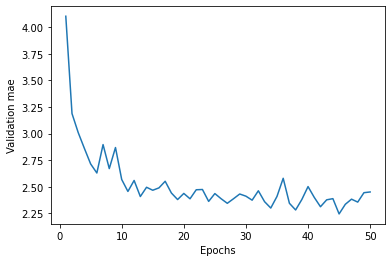

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(avg_mae)+1), avg_mae)
plt.xlabel("Epochs")
plt.ylabel("Validation mae")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Attempting to set identical bottom == top == 2 results in singular transformations; automatically expanding.
  from ipykernel import kernelapp as app


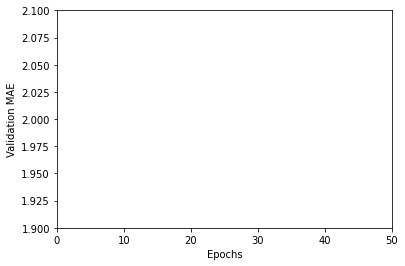

In [34]:
def smooth_curve(points, factor=0.9):
  sm_points=[]
  for i in points:
    if sm_points:
      prev = sm_points[-1]
      sm_points.append(prev*factor+i*(1-factor))
    else:
      sm_points.append(i)
    return sm_points

sm_mae = smooth_curve(avg_mae)
plt.plot(range(1, len(sm_mae) + 1), sm_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.axis([0,50,2,2])
plt.show()

In [24]:
model = build_model(train_data)
model.fit(train_data, train_labels, epochs=80, batch_size=16, verbose=0)
test_mse, test_mae = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 17.8878 - mae: 2.6692


## Wrapping up


Here's what you should take away from this example:

* Regression is done using different loss functions from classification; Mean Squared Error (MSE) is a commonly used loss function for 
regression.
* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally the concept of "accuracy" 
does not apply for regression. A common regression metric is Mean Absolute Error (MAE).
* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
* When there is little data available, using K-Fold validation is a great way to reliably evaluate a model.
* When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two), 
in order to avoid severe overfitting.

This example concludes our series of three introductory practical examples. You are now able to handle common types of problems with vector data input:

* Binary (2-class) classification.
* Multi-class, single-label classification.
* Scalar regression.

In the next chapter, you will acquire a more formal understanding of some of the concepts you have encountered in these first examples, 
such as data preprocessing, model evaluation, and overfitting.